# KMeans Clustering

In [1]:
import mglearn 

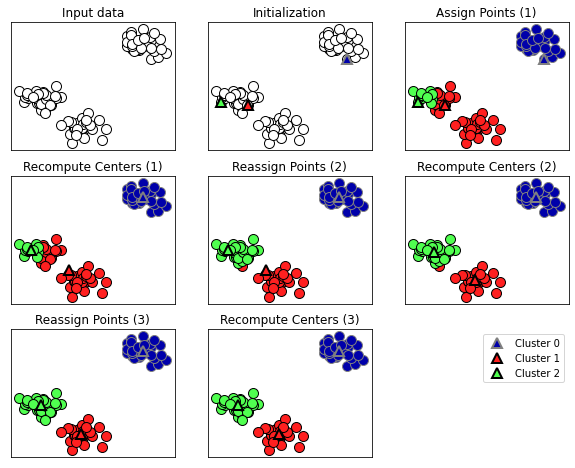

In [4]:
mglearn.plots.plot_kmeans_algorithm()

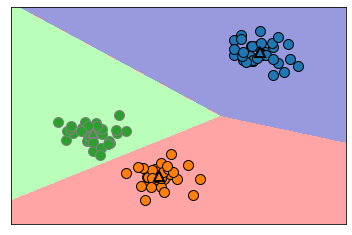

In [5]:
mglearn.plots.plot_kmeans_boundaries()

In [4]:
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification

In [ ]:
X,y= make_classification()

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [11]:
X,y = make_blobs(n_samples=50, centers=3, cluster_std=0.6)

In [12]:
cluster = KMeans(n_clusters=3)

In [14]:
fit = cluster.fit(X)

In [21]:
print(f'cluster membership:{fit.labels_}')

cluster membership:[1 2 2 0 2 0 1 0 1 2 0 0 1 0 2 2 2 2 2 0 1 1 1 2 1 0 1 0 1 2 0 1 0 1 2 1 2
 1 0 1 2 1 0 2 2 0 0 2 0 1]


In [23]:
print(f'predicted cluster member : {fit.predict(X)}')

predicted cluster member : [1 2 2 0 2 0 1 0 1 2 0 0 1 0 2 2 2 2 2 0 1 1 1 2 1 0 1 0 1 2 0 1 0 1 2 1 2
 1 0 1 2 1 0 2 2 0 0 2 0 1]


In [7]:
from matplotlib import pyplot as plt

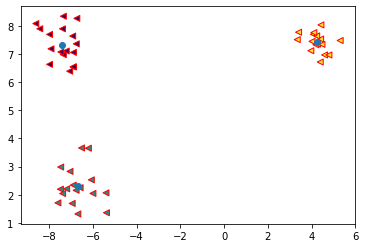

In [53]:
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='red', marker='<')
plt.scatter(fit.cluster_centers_[:, 0], fit.cluster_centers_[:,1], cmap='viridis');

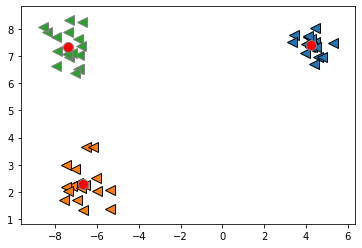

In [64]:
mglearn.discrete_scatter(X[:,0], X[:, 1], fit.labels_, markers='<')
mglearn.discrete_scatter(fit.cluster_centers_[:,0], fit.cluster_centers_[:,1], markers='o', c='red');

In [67]:
fit2 = KMeans(n_clusters=2)
fit3 = KMeans(n_clusters=5)

In [302]:
fit2.cluster_centers_.shape

(2, 2)

In [303]:
fit3.cluster_centers_.shape

(5, 2)

In [143]:
fitted2= fit2.fit(X)
fitted3 = fit3.fit(X)

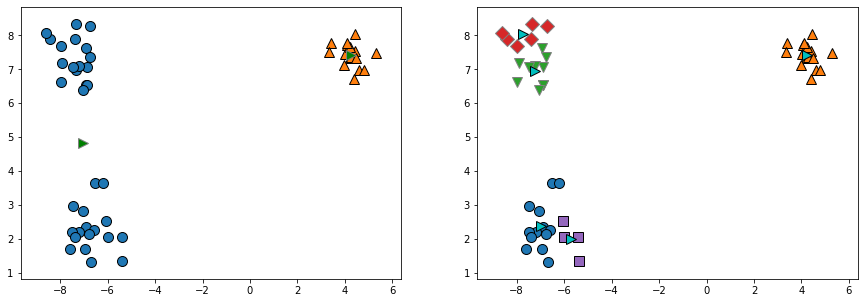

In [97]:
fig,axes = plt.subplots(1,2, figsize=(15,5))
mglearn.discrete_scatter(X[:, 0], X[:,1], fitted2.labels_ ,ax=axes[0])
mglearn.discrete_scatter(fitted2.cluster_centers_[:, 0], fitted2.cluster_centers_[:,1], markers='>',c='green',ax=axes[0])
mglearn.discrete_scatter(X[:, 0], X[:,1],fitted3.labels_ ,ax=axes[1]);
mglearn.discrete_scatter(fitted3.cluster_centers_[:, 0], fitted3.cluster_centers_[:,1], markers='>',c='cyan',ax=axes[1]);

# Failure cases of k-means

In [111]:
X_vary, y_vary = make_blobs(n_samples=100, centers=3, cluster_std=['1', '2.5','0.5'], random_state=170)

In [112]:
y_pred = KMeans(n_clusters=3).fit_predict(X_vary)

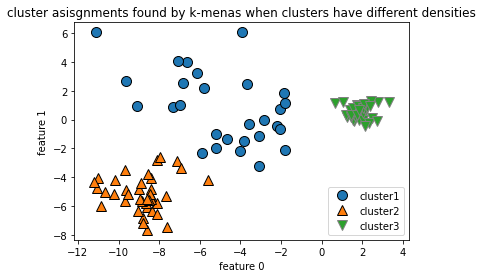

In [116]:
mglearn.discrete_scatter(X_vary[:,0], X_vary[:,1], y_pred)
plt.legend(['cluster1', 'cluster2', 'cluster3'], loc='lower right')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.title('cluster asisgnments found by k-menas when clusters have different densities');

In [8]:
import numpy as np

In [124]:
X, y = make_blobs(n_samples=600, random_state=170)
X =np.dot(X,np.random.normal(size=(2,2)))

In [130]:
ypred = KMeans(n_clusters=3).fit_predict(X)

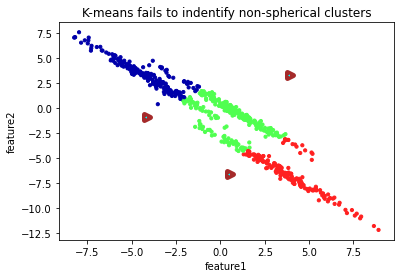

In [154]:
plt.scatter(X[:,0], X[:,1], c= ypred, cmap = mglearn.cm3, s=10,)
plt.scatter(KMeans(n_clusters=3).fit(X).cluster_centers_[:,0],KMeans(n_clusters=3).fit(X).cluster_centers_[:,1], marker='>', facecolor='cyan', edgecolor='brown', linewidth=5)
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('K-means fails to indentify non-spherical clusters');

In [156]:
from sklearn.datasets import make_moons

In [157]:
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [171]:
km = KMeans(n_clusters=2)
ftkm = km.fit(X)

In [172]:
y = ftkm.predict(X)

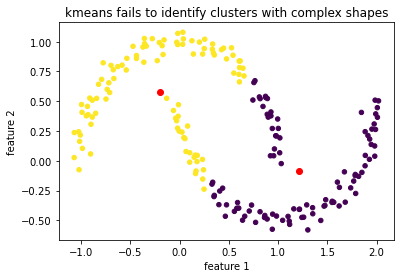

In [180]:
plt.scatter(X[:,0], X[:,1], c=y, marker='o', s=20)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], facecolor='red')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('kmeans fails to identify clusters with complex shapes');

# Vector quantization, or seeing k-means as decompostion

In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA

In [9]:
ppl = fetch_lfw_people(min_faces_per_person=20)

In [10]:
ppl.target.shape

(3023,)

In [22]:
mask = np.zeros(ppl.target.shape).astype(bool)

In [13]:
unitarget = np.unique(ppl.target)
for i in unitarget:
    mask[np.where(ppl.target==i)[0][:50]]=1

In [571]:
Xppl= ppl.data[mask]
yppl =ppl.target[mask]

In [572]:
Xppl=Xppl/255

In [294]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y, random_state=0)

In [295]:
Xtrain.shape

(1547, 2914)

In [296]:
pca = PCA(n_components=100, random_state=0)
nmf = NMF(n_components=100, random_state=0)
Km = KMeans(n_clusters=100, random_state=0)

In [696]:
ftpca= pca.fit(Xtrain)
trpca = ftpca.transform(Xtest)
ftnmf = nmf.fit(Xtrain)
trnmf = ftnmf.transform(Xtest)
ftkm = km.fit(Xtrain)
trkm = ftkm.predict(Xtest)


X_reconstructed_pca=pca.inverse_transform(trpca)
X_reconstructed_kmeans = km.cluster_centers_[trkm]
X_reconstructed_nmf = np.dot(trnmf, nmf.components_)

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [697]:
print(trkm.shape)
print(km.cluster_centers_.shape)
print(km.cluster_centers_[trkm].shape)

(516,)
(10, 2914)
(516, 2914)


In [698]:
print(trnmf.shape)
print(nmf.components_.shape)
print(np.dot(trnmf, nmf.components_).shape)

(516, 100)
(100, 2914)
(516, 2914)


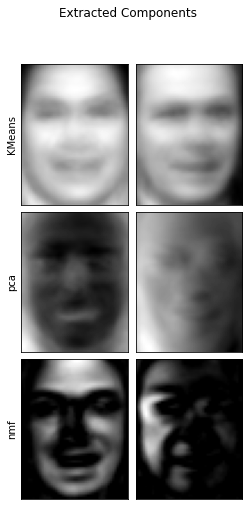

In [708]:
fig, axes = plt.subplots(3, 2, figsize=(4,8), subplot_kw= dict(xticks=[], yticks=[]), gridspec_kw=dict(hspace=0.05, wspace=0.05))
fig.suptitle('Extracted Components')
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, km.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(62,47), cmap='binary_r')
    ax[1].imshow(comp_pca.reshape(62,47),cmap='binary_r')
    ax[2].imshow(comp_nmf.reshape(62,47),cmap='binary_r')
axes[0,0].set_ylabel('KMeans')
axes[1,0].set_ylabel('pca')
axes[2,0].set_ylabel('nmf');

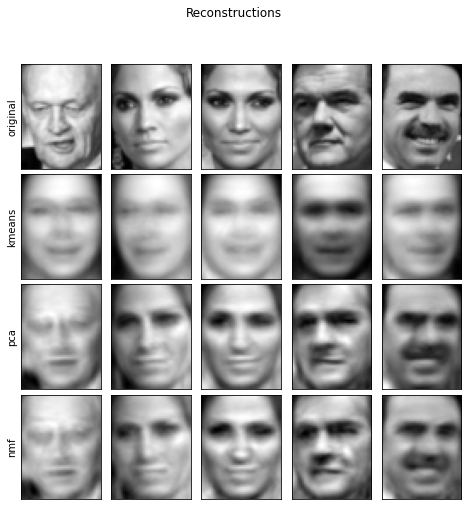

In [700]:
fig, axes = plt.subplots(4, 5,figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.05, wspace=0.05))
fig.suptitle('Reconstructions')
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, Xtest, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(62,47), cmap='binary_r')
    ax[1].imshow(rec_kmeans.reshape(62,47),cmap='binary_r')
    ax[2].imshow(rec_nmf.reshape(62,47),cmap='binary_r')
    ax[3].imshow(rec_pca.reshape(62,47),cmap='binary_r')
axes[0,0].set_ylabel('original')
axes[1,0].set_ylabel('kmeans')
axes[2,0].set_ylabel('pca')
axes[3,0].set_ylabel('nmf');

In [338]:
X1, y1 = make_moons(n_samples=200, noise=0.05, random_state=0)

In [342]:
Kmeans = KMeans(n_clusters=10, random_state=0)
predict = Kmeans.fit(X1).predict(X1)

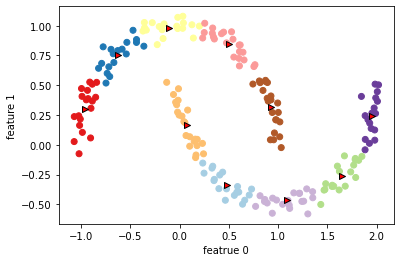

In [357]:
plt.scatter(X1[:,0], X1[:,1], c = predict,cmap='Paired')
plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1], marker='>', facecolor='red', edgecolor='k', linewidth=1)
plt.xlabel('featrue 0')
plt.ylabel('feature 1');

In [362]:
print(f'cluster membership:\n {Kmeans.labels_}')

cluster membership:
 [9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


In [363]:
trX= Kmeans.transform(X1)

In [366]:
print(f'Distance feature shape:\n {trX.shape}')
print(f'Distance feature:\n {trX}')

Distance feature shape:
 (200, 10)
Distance feature:
 [[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


# Agglomerative Clustering

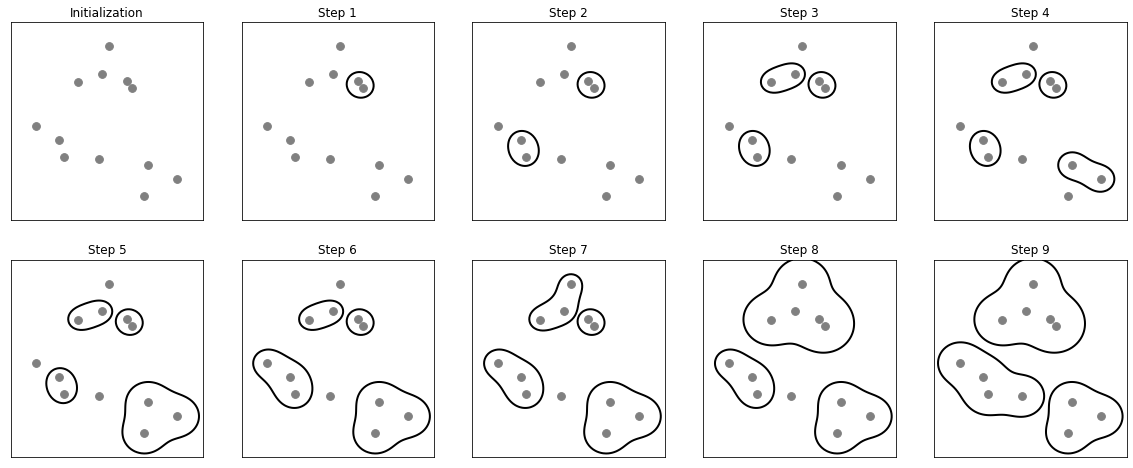

In [378]:
mglearn.plots.plot_agglomerative_algorithm()

In [379]:
from sklearn.cluster import AgglomerativeClustering

In [380]:
X,y = make_blobs(random_state=1)

In [384]:
agg = AgglomerativeClustering(n_clusters=3)

In [385]:
pred = agg.fit_predict(X)

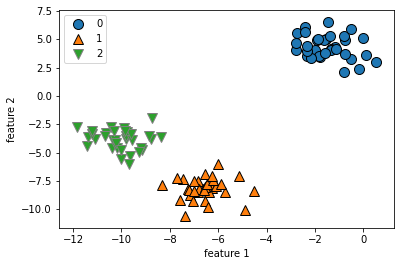

In [398]:
mglearn.discrete_scatter(X[:,0], X[:,1],pred)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend();

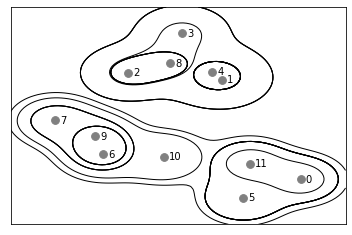

In [400]:
mglearn.plots.plot_agglomerative()

In [401]:
from scipy.cluster.hierarchy import dendrogram, ward

In [402]:
X,y=make_blobs(random_state=0, n_samples=12)

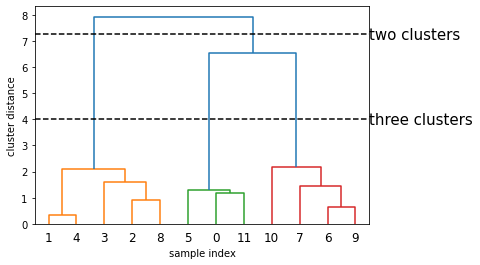

In [412]:
linkage_array=ward(X)
dendrogram(linkage_array);
ax=plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds,[7.25,7.25], '--', c='k')
ax.plot(bounds,[4,4], '--', c='k')
ax.text(bounds[1],7.25, 'two clusters', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, 'three clusters', va='center', fontdict={'size':15})
plt.xlabel('sample index')
plt.ylabel('cluster distance');

# DBSCAN

In [413]:
from sklearn.cluster import DBSCAN

In [415]:
X2,y2 = make_blobs(random_state=0, n_samples=12)

In [416]:
dbscan = DBSCAN()

In [417]:
cluster=dbscan.fit_predict(X2)

In [418]:
print(f'cluster memberships: {cluster}') ## -1 stands for noise

cluster memberships: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


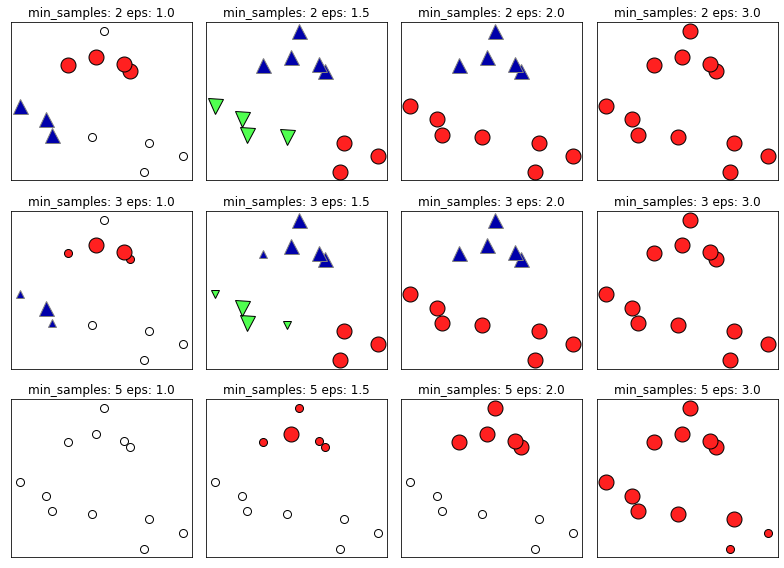

In [419]:
mglearn.plots.plot_dbscan()

In [427]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

In [424]:
X4, y4= make_moons(n_samples=200, noise=0.05, random_state=0)

In [428]:
scaled = StandardScaler().fit_transform(X4)

In [429]:
pred = dbscan.fit_predict(scaled)

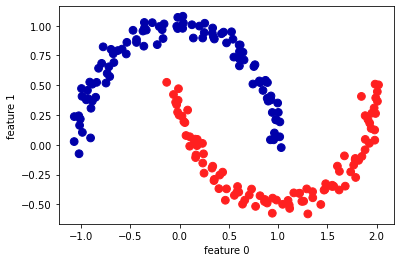

In [435]:
plt.scatter(X4[:,0], X4[:,1], c=pred, cmap=mglearn.cm2, s=60)
plt.xlabel('feature 0')
plt.ylabel('feature 1');

# Comparing and evaluating clustering algorithms

### evaluating clustering with groud truth

In [436]:
from sklearn.metrics.cluster import adjusted_rand_score

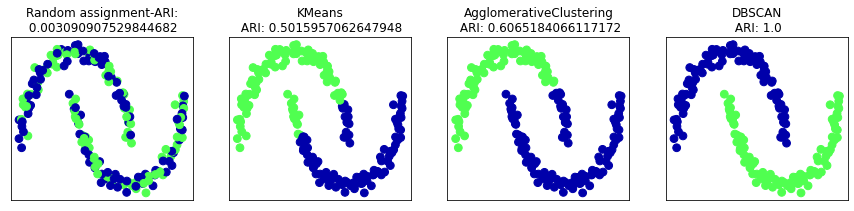

In [454]:
fig, axes = plt.subplots(1, 4, figsize=(15,3), subplot_kw=dict(xticks=[], yticks=[]))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
random_state = np.random.RandomState(seed=0)
random_cluster=random_state.randint(low=0, high=2, size=len(X4))
axes[0].scatter(scaled[:,0], scaled[:,1], c=random_cluster, cmap=mglearn.cm3, s=60)
axes[0].set_title(f'Random assignment-ARI:\n {adjusted_rand_score(y4, random_cluster)}')

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(scaled)
    ax.scatter(scaled[:,0], scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title(f'{algorithm.__class__.__name__}\n ARI: {adjusted_rand_score(y4, clusters)}')

In [448]:
KMeans(n_clusters=2).__class__.__name__

'KMeans'

### cannot use accuracy_score for cluster evaluation

In [455]:
from sklearn.metrics import accuracy_score

In [456]:
cluster1=[0,0,1,1,0]
cluster2=[1,1,0,0,1]

In [458]:
print(f'accuracy: {accuracy_score(cluster1, cluster2)}')
print(f'ARI:{adjusted_rand_score(cluster1, cluster2)}')

accuracy: 0.0
ARI:1.0


In [459]:
from sklearn.metrics.cluster import silhouette_score

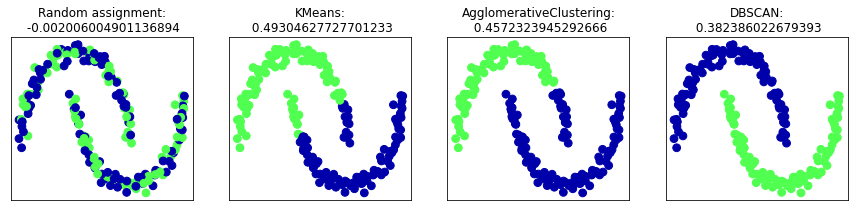

In [468]:
fig, axes = plt.subplots(1,4, figsize=(15,3), subplot_kw=dict(xticks=[], yticks=[]))
random_state=np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(scaled))
axes[0].scatter(scaled[:,0], scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title(f'Random assignment:\n {silhouette_score(scaled, random_clusters)}')

for ax, algorithm in zip(axes[1:], algorithms):
    cluster1 = algorithm.fit_predict(scaled)
    ax.scatter(scaled[:,0], scaled[:,1], c=cluster1, cmap=mglearn.cm3, s=60)
    ax.set_title(f'{algorithm.__class__.__name__}:\n {silhouette_score(scaled, cluster1)}')

### analyzing the faces dataset with DBSCAN

In [709]:
pcadb = PCA(n_components=100, whiten=True, random_state=0)

In [710]:
transpca = pcadb.fit_transform(Xtrain)

In [711]:
labels = dbscan.fit_predict(transpca)

In [712]:
labels.shape

(1547,)

In [713]:
print(f'unique labels: {np.unique(labels)}')

unique labels: [-1  0  1  2  3  4]


In [714]:
dbscan = DBSCAN(min_samples=3)
labels=dbscan.fit_predict(transpca)

In [715]:
print(f'unique labels: {np.unique(labels)}')

unique labels: [-1]


In [716]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels=dbscan.fit_predict(transpca)

In [717]:
print(f'unique labels: {np.unique(labels)}')

unique labels: [-1  0]


In [718]:
print(f'number of points per cluste: {np.bincount(labels+1)}')

number of points per cluste: [  20 1527]


In [719]:
noise=Xtrain[labels==-1]

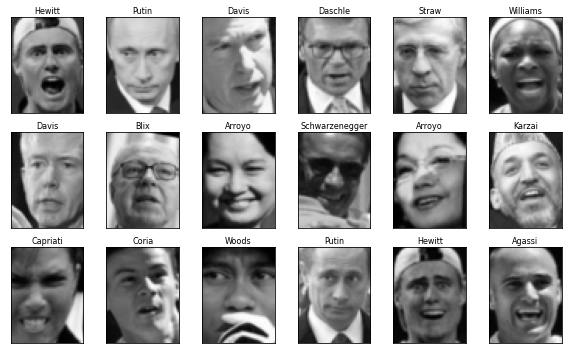

In [724]:
fig, axes = plt.subplots(3,6, figsize=(10,6), subplot_kw = dict(xticks=[], yticks=[]), )
for ax, image, name in zip(axes.flat, noise, ppl.target_names[ytrain[labels==-1]]):
    ax.imshow(image.reshape(62,47), vmin=0, vmax=1, cmap='binary_r')
    ax.set_title(name.split()[-1],size=8, va='center', ha='center')

In [729]:
for eps in [1,3,5,7,9,11,13]:
    print(f'eps={eps}')
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels= dbscan.fit_predict(transpca)
    print(f'clusters present: {np.unique(labels)}')
    print(f'cluster sizes:    {np.bincount(labels+1)}\n')

eps=1
clusters present: [-1]
cluster sizes:    [1547]

eps=3
clusters present: [-1]
cluster sizes:    [1547]

eps=5
clusters present: [-1]
cluster sizes:    [1547]

eps=7
clusters present: [-1  0  1  2  3  4]
cluster sizes:    [1523   11    3    4    3    3]

eps=9
clusters present: [-1  0  1  2  3]
cluster sizes:    [988 549   4   3   3]

eps=11
clusters present: [-1  0]
cluster sizes:    [ 345 1202]

eps=13
clusters present: [-1  0]
cluster sizes:    [ 103 1444]



In [730]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels=dbscan.fit_predict(transpca)

In [731]:
range(max(labels+1))

range(0, 5)

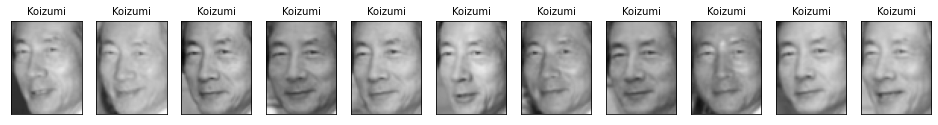

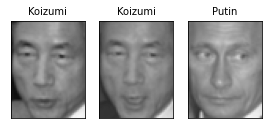

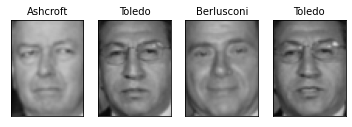

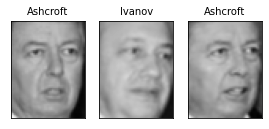

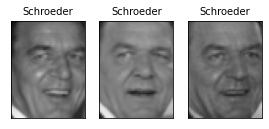

In [737]:
for cluster in range(max(labels)+1):
    mask=labels==cluster
    n_image = np.sum(mask)
    fig,axes = plt.subplots(1,n_image, figsize=(n_image*1.5, 4), subplot_kw=dict(xticks=[],yticks=[]))
    for image, label, ax in zip(Xtrain[mask], ytrain[mask], axes):
        ax.imshow(image.reshape(62,47), vmin=0, vmax=1, cmap='binary_r')
        ax.set_title(ppl.target_names[label].split()[-1], size=10)

# Analyzing the faces dataset with k-means.

In [613]:
transformppl= pcadb.fit_transform(ppl.data)

In [614]:
km=KMeans(n_clusters=10, random_state=0)

In [615]:
labels=km.fit_predict(transformppl)

In [600]:
print(f'Center size: {np.bincount(labels)}')

Center size: [178 325 281 341 261 289 279 513 106 450]


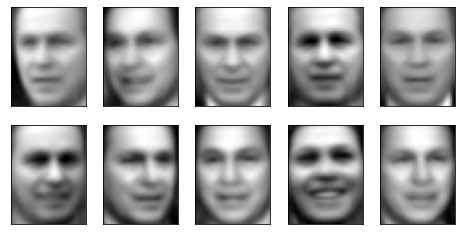

In [601]:
fig, axes = plt.subplots(2,5, figsize=(8,4), subplot_kw=dict(xticks=[], yticks=[]))
for ax, center in zip(axes.flat, km.cluster_centers_):
    ax.imshow(pcadb.inverse_transform(center).reshape(62,47), cmap='binary_r')

In [616]:
labels

(3023,)

In [608]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [603]:
ppl.data[labels==8].shape

(106, 2914)

In [628]:
ppl.target_names[ppl.target[labels==8]].shape

(106,)

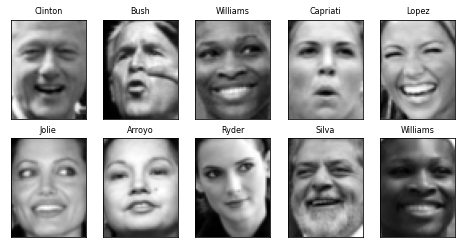

In [690]:
fig,axes = plt.subplots(2,5,figsize=(8,4), subplot_kw=dict(xticks=[],yticks=[]))
for ax, image, name in zip(axes.flat, ppl.data[labels==8], ppl.target_names[ppl.target[labels==8]]):
    ax.imshow(image.reshape(62,47), cmap='binary_r')
    ax.set_title(name.split()[-1], size=8, ha='center')

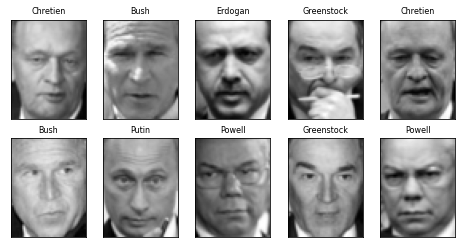

In [691]:
fig,axes = plt.subplots(2,5,figsize=(8,4), subplot_kw=dict(xticks=[],yticks=[]))
for ax, image, name in zip(axes.flat, ppl.data[labels==2], ppl.target_names[ppl.target[labels==2]]):
    ax.imshow(image.reshape(62,47), cmap='binary_r')
    ax.set_title(name.split()[-1], size=8, ha='center')

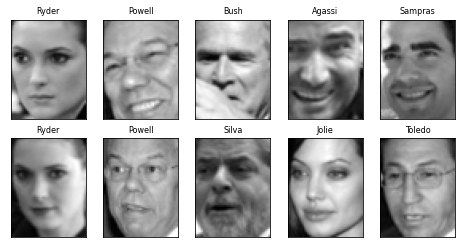

In [692]:
fig,axes = plt.subplots(2,5,figsize=(8,4), subplot_kw=dict(xticks=[],yticks=[]))
for ax, image, name in zip(axes.flat, ppl.data[labels==1], ppl.target_names[ppl.target[labels==1]]):
    ax.imshow(image.reshape(62,47), cmap='binary_r')
    ax.set_title(name.split()[-1], size=8, ha='center')

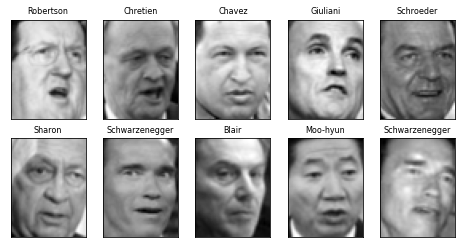

In [693]:
fig,axes = plt.subplots(2,5,figsize=(8,4), subplot_kw=dict(xticks=[],yticks=[]))
for ax, image, name in zip(axes.flat, ppl.data[labels==6], ppl.target_names[ppl.target[labels==6]]):
    ax.imshow(image.reshape(62,47), cmap='binary_r')
    ax.set_title(name.split()[-1], size=8, ha='center')

### analyzing the faces dataset with agglomerative clustering

In [638]:
agglomerative = AgglomerativeClustering(n_clusters=10)

In [639]:
labels_agg = agglomerative.fit_predict(transformppl)

In [640]:
print(f'cluster sizes agglomerative clustering: {np.bincount(labels_agg)}')

cluster sizes agglomerative clustering: [1022  365  214  360  192  128  111  569   20   42]


In [641]:
print(f'ARI: {adjusted_rand_score(labels_agg, labels)}') ## that means labels_agg and labels_km have little in common

ARI: 0.10282121025145056


In [642]:
linkage_array = ward(transpca)

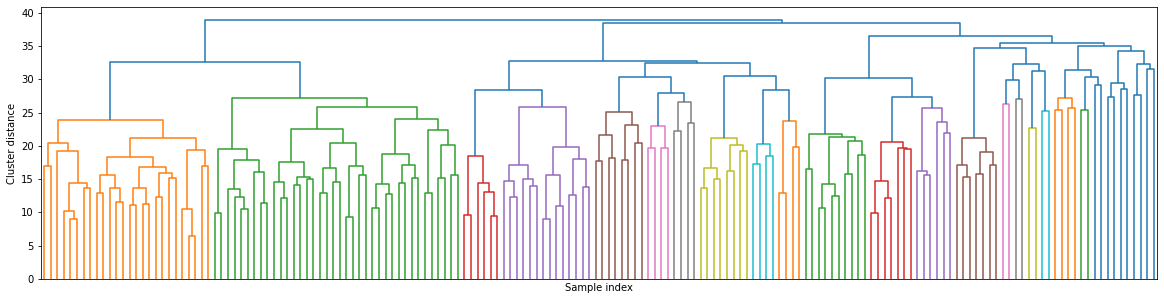

In [647]:
plt.figure(figsize=(20,5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');

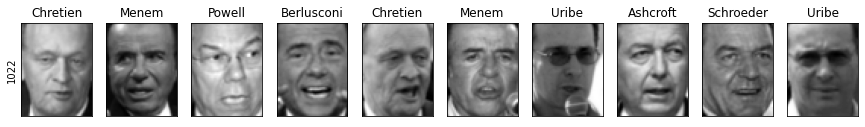

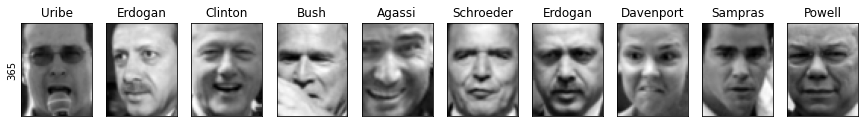

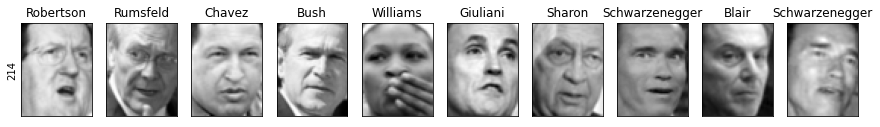

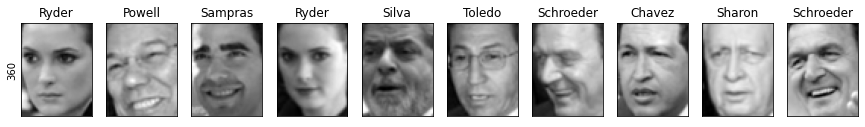

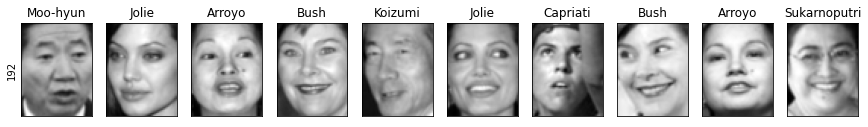

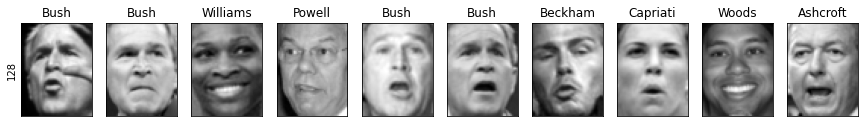

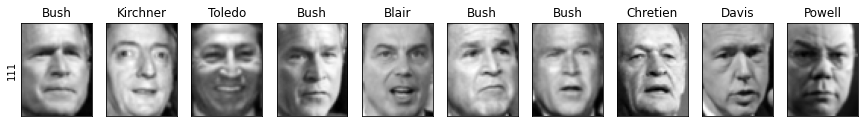

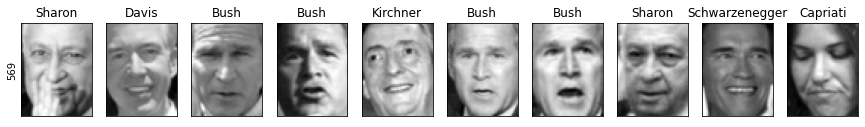

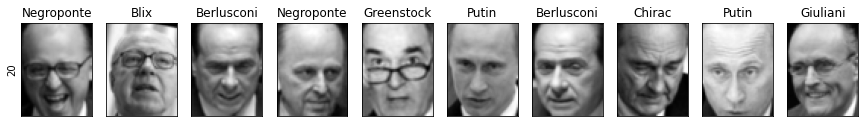

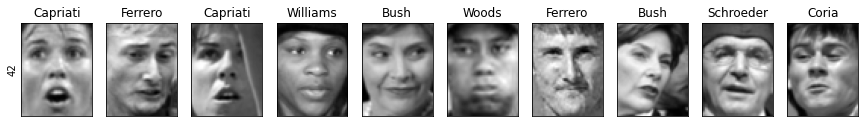

In [871]:
for cluster in range(10):
    mask = labels_agg==cluster
    fig, axes = plt.subplots(1, 10,figsize=(15,8), subplot_kw=dict(xticks=[], yticks=[]))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, ax in zip(ppl.data[mask], ppl.target[mask], axes):
        ax.imshow(image.reshape(62, 47), cmap='binary_r')
        ax.set_title(ppl.target_names[label].split()[-1])

In [652]:
agglomerative2 = AgglomerativeClustering(n_clusters=40)

In [665]:
labels_agg2 = agglomerative2.fit_predict(transformppl)

In [860]:
labels_agg2.shape

(3023,)

In [666]:
print(f'clusters sizes agglomerative clustering:\n {np.bincount(labels_agg2)}')

clusters sizes agglomerative clustering:
 [100 171 224  47  58 167 193  58 203  31  26  77  53 113  28 107  22  83
  74   6 157  48  43  48  81  35  62  36 145  19 112  52  52   8  23  20
  45  59  58  79]


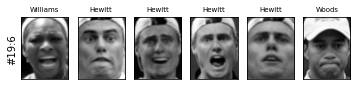

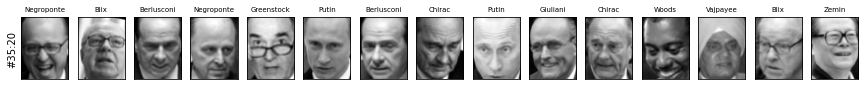

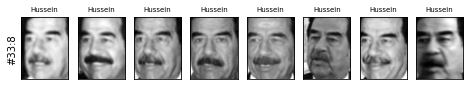

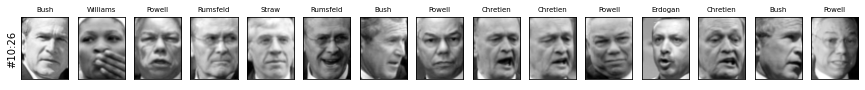

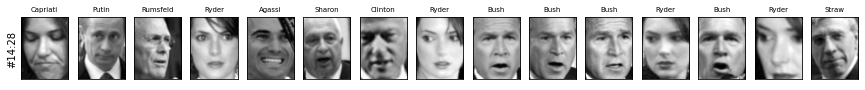

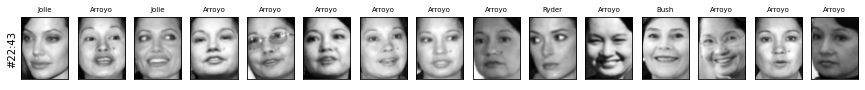

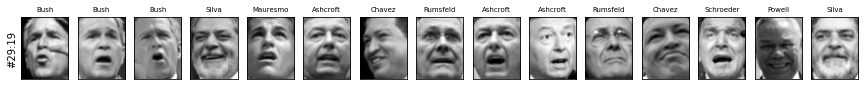

In [862]:
for cluster in [19, 35, 33,10,14,22,29]:
    mask = labels_agg2==cluster
    cluster_size = np.sum(mask)
    fig, axes = plt.subplots(1,15,figsize=(15,8),subplot_kw=dict(xticks=[], yticks=[]))
    axes[0].set_ylabel(f'#{cluster}:{np.sum(mask)}')
    for ax, image, label in zip(axes, ppl.data[mask], ppl.target_names[ppl.target[mask]]):
        ax.imshow(image.reshape(62,47), cmap='binary_r')
        ax.set_title(label.split()[-1], size=7)
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

In [859]:
np.argsort(ppl.target_names=='Angelina Jolie')[::-1][0]

4

In [ ]:
ppl.target.shape

(3023,)

In [841]:
ppl.data.shape

(3023, 2914)

In [834]:
ppl.data[ppl.target==4].shape

(20, 2914)

In [839]:
ppl.target_names[4]

'Angelina Jolie'

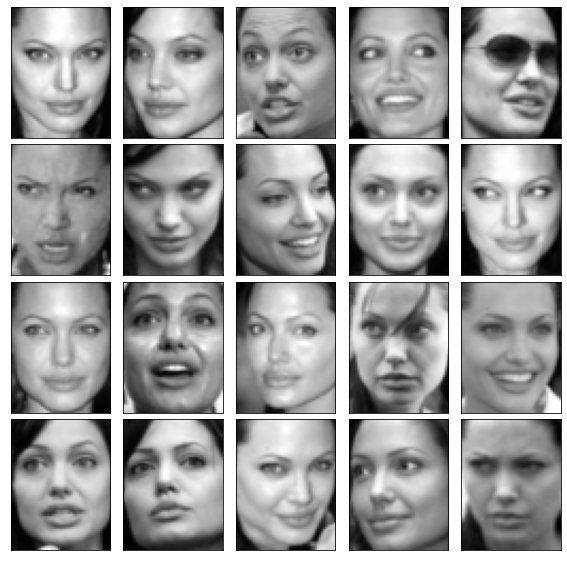

In [856]:
fig, axes = plt.subplots(4,5, figsize=(10,10), subplot_kw=dict(xticks=[], yticks=[]), gridspec_kw=dict(hspace=0.05, wspace=0.05))
for image, ax in zip(ppl.data[ppl.target==4], axes.flat):
    ax.imshow(image.reshape(62,47), cmap='binary_r')

In [868]:
np.argsort(ppl.target_names=='Winona Ryder')[::-1][0]

61

In [869]:
ppl.data[ppl.target==30].shape

(20, 2914)

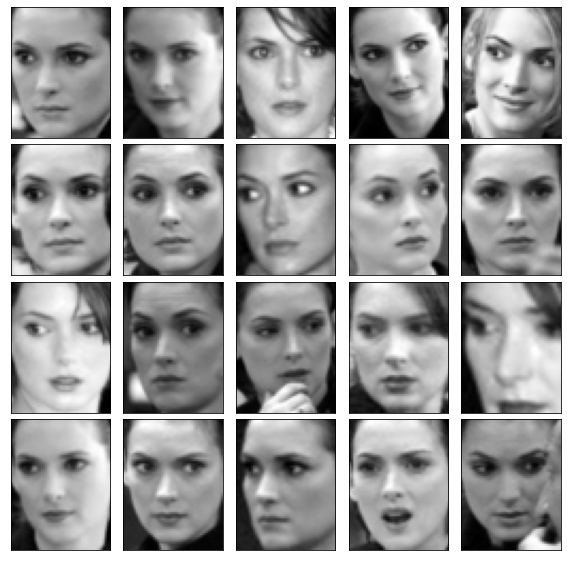

In [870]:
fig, axes = plt.subplots(4,5, figsize=(10,10), subplot_kw=dict(xticks=[], yticks=[]), gridspec_kw=dict(hspace=0.05, wspace=0.05))
for image, ax in zip(ppl.data[ppl.target==61], axes.flat):
    ax.imshow(image.reshape(62,47), cmap='binary_r')